In [1]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

## Preparing Data
60% training, 20% validation, and 20% testing

In [2]:
# TODO: Move these two functions to a shared file for helper functions
def unPickleData(filename):
  with open(filename,'rb') as f: arr = pickle.load(f)
  return arr

def getDataPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"processed_data", dirname,filename)

x_data = unPickleData(getDataPath("posts","X_posts_sub.pkl"))
y_data = unPickleData(getDataPath("posts","Y_posts_sub.pkl"))

n = len(x_data)
x_data_training = x_data[:int(0.6*n)]
x_data_validation = x_data[int(0.6*n):int(0.8*n)]
x_data_testing = x_data[int(0.8*n):]

y_data_training = y_data[:int(0.6*n)]
y_data_validation = y_data[int(0.6*n):int(0.8*n)]
y_data_testing = y_data[int(0.8*n):]

## Training

In [3]:
model = LogisticRegression(multi_class='ovr',solver="liblinear") 
model.fit(x_data_training, y_data_training)

LogisticRegression(multi_class='ovr', solver='liblinear')

## Learning Curve

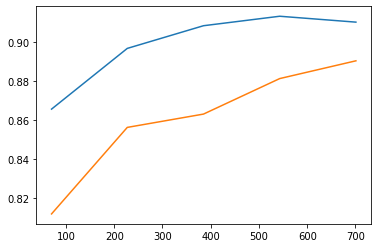

In [4]:
train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(model,x_data_training,y_data_training)
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))

## Model Selection

In [5]:
grid = {"C":np.logspace(-3,3,100), "penalty":["l1","l2"]}

search = GridSearchCV(model,grid,cv=10)
search.fit(x_data_validation,y_data_validation)

print("Tuned hpyerparameters :(best parameters) ",search.best_params_)
print("Accuracy :",search.best_score_)

best_model = search.best_estimator_

Tuned hpyerparameters :(best parameters)  {'C': 5.72236765935022, 'penalty': 'l2'}
Accuracy : 0.8837931034482759


## Testing

### Excluding the validation set

In [6]:
y_pred = best_model.predict(x_data_testing)

print(sklearn.metrics.classification_report(y_data_testing,y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(y_data_testing, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       218
           1       0.98      0.64      0.77        75

    accuracy                           0.90       293
   macro avg       0.93      0.82      0.86       293
weighted avg       0.91      0.90      0.90       293

Accuracy:  0.9044368600682594


### Including the validation set
Because of the lack of representation of the class "bot", especially in the testing data, the model reflects poor results when it comes to the recall and f-score.

In [7]:
y_pred = best_model.predict(np.concatenate((x_data_testing,x_data_validation))
)
print(sklearn.metrics.classification_report(np.concatenate((y_data_testing,y_data_validation)),y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(np.concatenate((y_data_testing,y_data_validation)), y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       427
           1       0.98      0.73      0.84       158

    accuracy                           0.92       585
   macro avg       0.95      0.86      0.89       585
weighted avg       0.93      0.92      0.92       585

Accuracy:  0.9230769230769231
